In [ ]:
"""
Complete Machine Learning Pipeline for IRIS Dataset
Following 10-Step Process: Problem Understanding → Data Understanding → Feature Understanding
→ Feature Engineering → Dataset Partition → Data Modelling → Evaluation → Hyper-parameter Tuning
→ Best Model Building → Conclusion
"""

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, mean_squared_error,
                             mean_absolute_error, r2_score)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# STEP 1: PROBLEM UNDERSTANDING
'''
Dataset: IRIS
Iris Dataset là một tập dữ liệu khác phù hợp với những ai mới bắt đầu với ML và muốn rèn luyện về hồi quy tuyến tính.
Features: Sepal Length, Sepal Width, Petal Length, Petal Width (4 features)
Target: Species (Setosa, Versicolor, Virrginica)
Problem Type: Multi-class Classification
'''

'\nDataset: IRIS\nIris Dataset là một tập dữ liệu khác phù hợp với những ai mới bắt đầu với ML và muốn rèn luyện về hồi quy tuyến tính. \nFeatures: Sepal Length, Sepal Width, Petal Length, Petal Width (4 features)\nTarget: Species (Setosa, Versicolor, Virrginica)\nProblem Type: Multi-class Classification\n'

In [ ]:
# STEP 2: DATA UNDERSTANDING
# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target
df['Target_Name'] = df['Target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [ ]:
# Data Shape
df.shape

(150, 6)

In [ ]:
# First 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
 5   Target_Name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Basic Statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Missing Values
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Target,0
Target_Name,0


In [ ]:
outlier_indices = set()

# Check for outliers using IQR
for col in iris.feature_names:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  outliers = df[(df[col]<Q1-1.5*IQR) | (df[col]>Q3+1.5*IQR)]
  print(f"{col}: {len(outliers)} outliers")

  # Lưu chỉ số các dòng bị outlier
  outlier_indices.update(outliers.index)

# Loại bỏ các dòng outliers
df_clean = df.drop(list(outlier_indices))

sepal length (cm): 0 outliers
sepal width (cm): 4 outliers
petal length (cm): 0 outliers
petal width (cm): 0 outliers


In [ ]:
df_clean.shape
df = df_clean

In [ ]:
# Check class distribution
df['Target_Name'].value_counts()

,count
Target_Name,
Virginica,50
Versicolor,49
Setosa,47


In [ ]:
df.iloc[:, :-2].skew()

,0
sepal length (cm),0.278417
sepal width (cm),0.131562
petal length (cm),-0.324099
petal width (cm),-0.146606


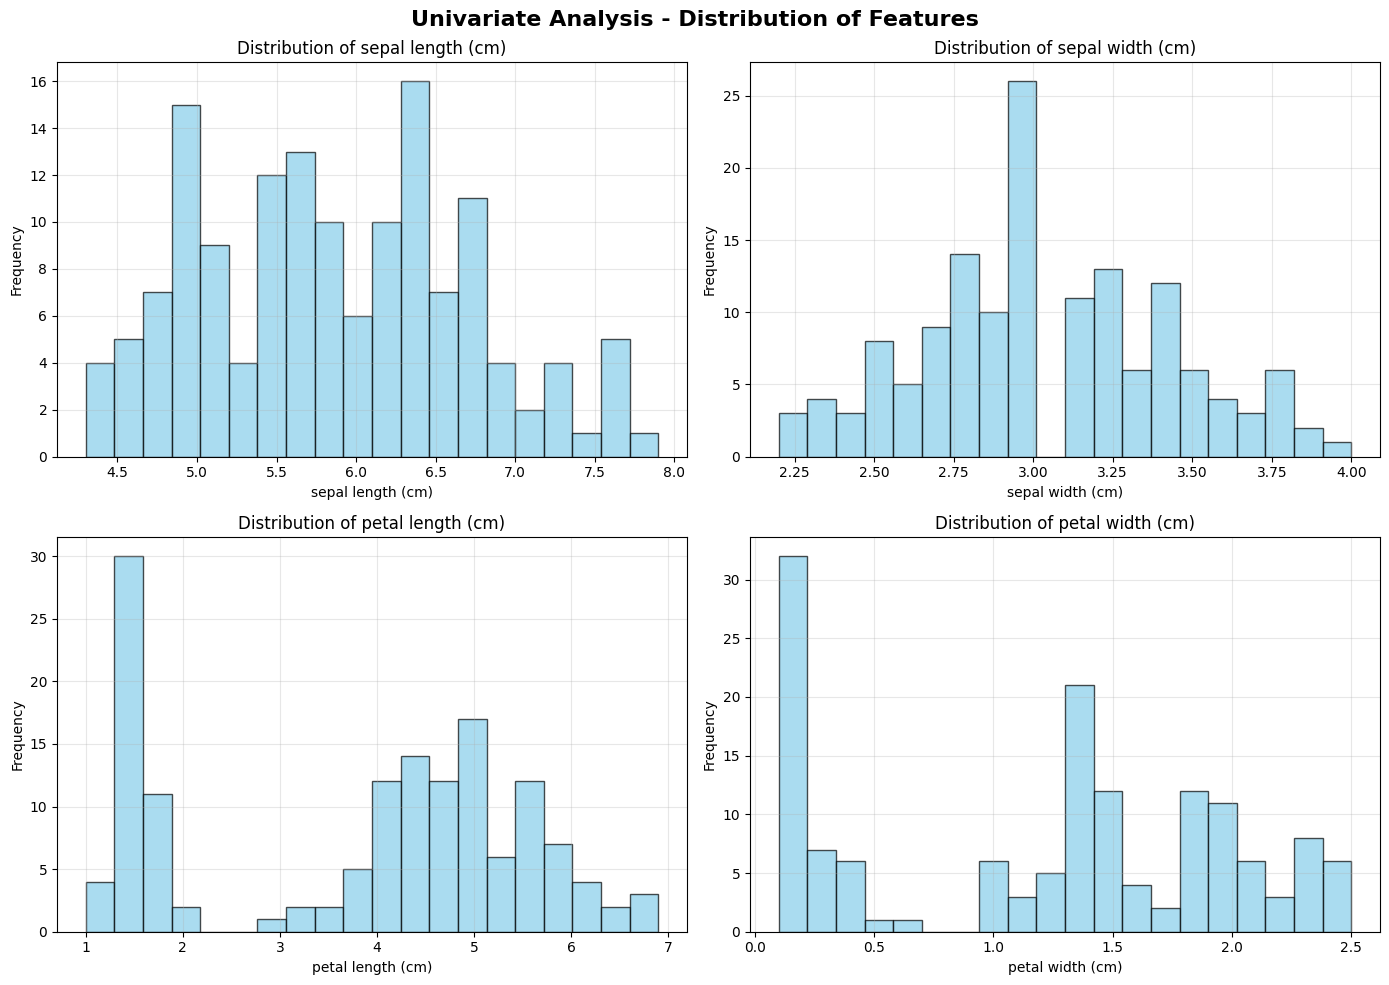

In [ ]:
# STEP 3: FEATURE UNDERSTANDING - EDA WITH VISUALIZATION

fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.suptitle("Univariate Analysis - Distribution of Features", fontsize=16, fontweight='bold')

for idx, col in enumerate(iris.feature_names):
    ax = axes[idx//2, idx%2]
    ax.hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

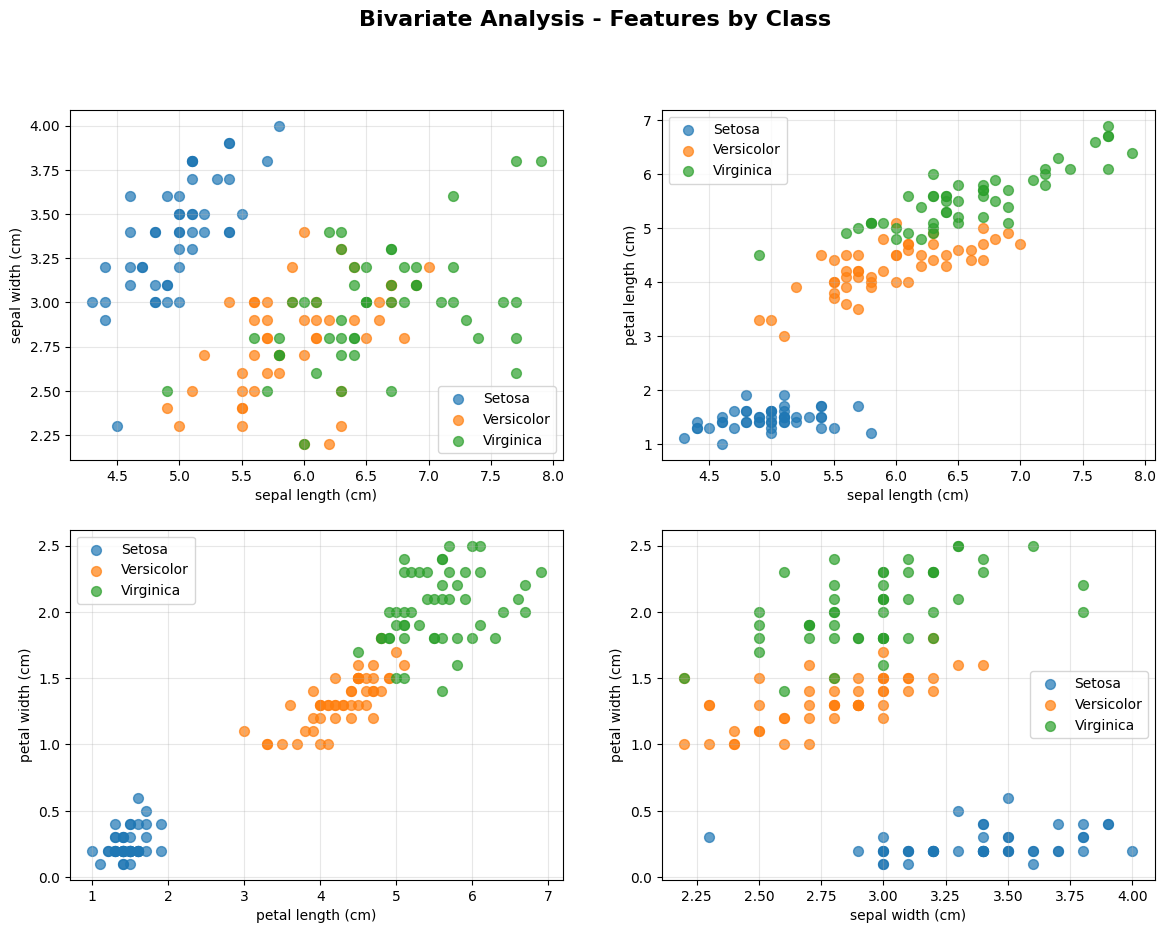

In [ ]:
# Bivariate Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analysis - Features by Class', fontsize=16, fontweight='bold')

feature_pairs = [
    ('sepal length (cm)', 'sepal width (cm)'),
    ('sepal length (cm)', 'petal length (cm)'),
    ('petal length (cm)', 'petal width (cm)'),
    ('sepal width (cm)', 'petal width (cm)')
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx//2, idx%2]
    for target in [0, 1, 2]:
        mask = df['Target'] == target
        ax.scatter(df[mask][feat1], df[mask][feat2],
                  label=df[df['Target']==target]['Target_Name'].iloc[0], s=50, alpha=0.7)
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.legend()
    ax.grid(alpha=0.3)

plt.show()

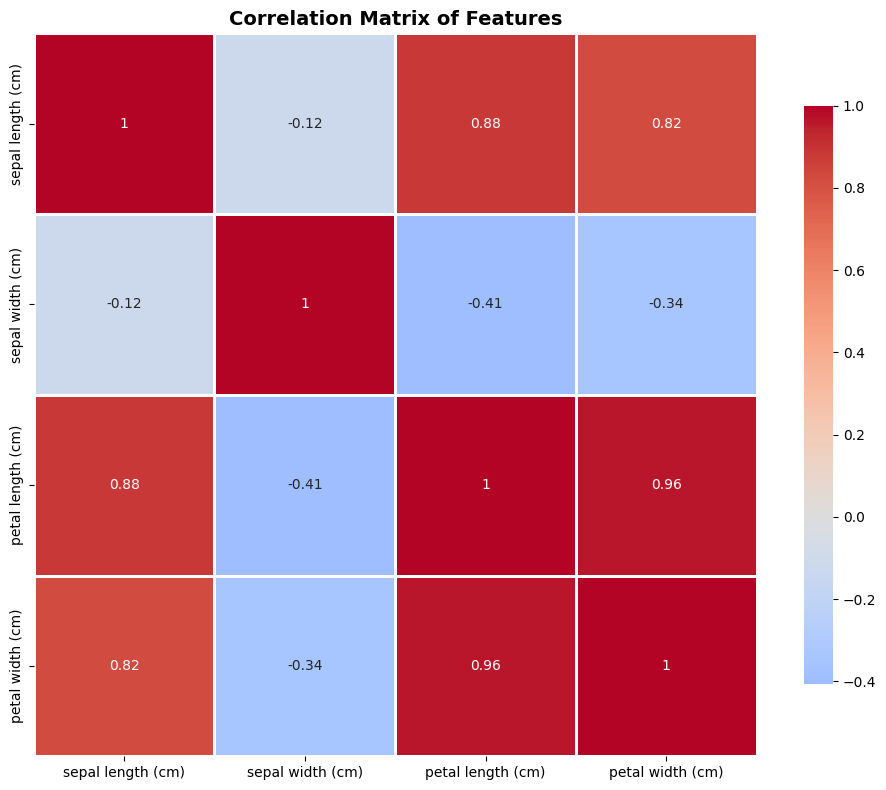

In [ ]:

# Multivariate Analysis - Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
correlation = df.iloc[:, :-2].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# STEP 4: FEATURE ENGINEERING

X = df.iloc[:, :-2].values
y = df['Target'].values

print(X.shape)
print(y.shape)

(146, 4)
(146,)


In [ ]:
# Check for missing values (already done, but confirming)
# Outlier handling using IQR
# Feature Encoding (already numeric)
# Feature Enrichment
# Feature Transformation
# Feature Selection

In [ ]:
# STEP 5: DATASET PARTITION
# Train-Test Split (80-20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify = y
)

In [ ]:
X_train.shape

(116, 4)

In [ ]:
y_train.shape

(116,)

In [ ]:
# Class distribution in Training set:
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c} ({c/len(y_train)*100:.1f}%)")

print('=============')

# Class distribution in Test set:
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c} ({c/len(y_test)*100:.1f}%)")

  Class 0: 37 (31.9%)
  Class 1: 39 (33.6%)
  Class 2: 40 (34.5%)
  Class 0: 10 (33.3%)
  Class 1: 10 (33.3%)
  Class 2: 10 (33.3%)


In [ ]:
# STEP 5: DATA MODELING

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {}

In [ ]:
# Model 1: Logistic Regression (for classification)
print("Model 1: Logistic Regression (for classification)")
lr_model = LogisticRegression(max_iter=200, random_state=42, multi_class='multinomial')
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression']=lr_model
y_pred_lr = lr_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Model 1: Logistic Regression (for classification)
Accuracy: 0.9333


In [ ]:
# Model 2: SVM - Support Vector Machine (Classification)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
models['SVM'] = svm_model
y_pred_svm = svm_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

Accuracy: 0.9667


In [ ]:
# Model 3: Random Forest (Classification - for comparison)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Accuracy: 0.9333



--------------------------------------------------------------------------------
1. LOGISTIC REGRESSION
--------------------------------------------------------------------------------
Accuracy:  0.9333
Precision: 0.9333
Recall:    0.9333
F1-Score:  0.9333

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

--------------------------------------------------------------------------------
2. SUPPORT VECTOR MACHINE (SVM)
--------------------------------------------------------------------------------
Accuracy:  0.9667
Precision: 0.9697
Recall:    0.9667
F1-Score:  0.9666

Classification

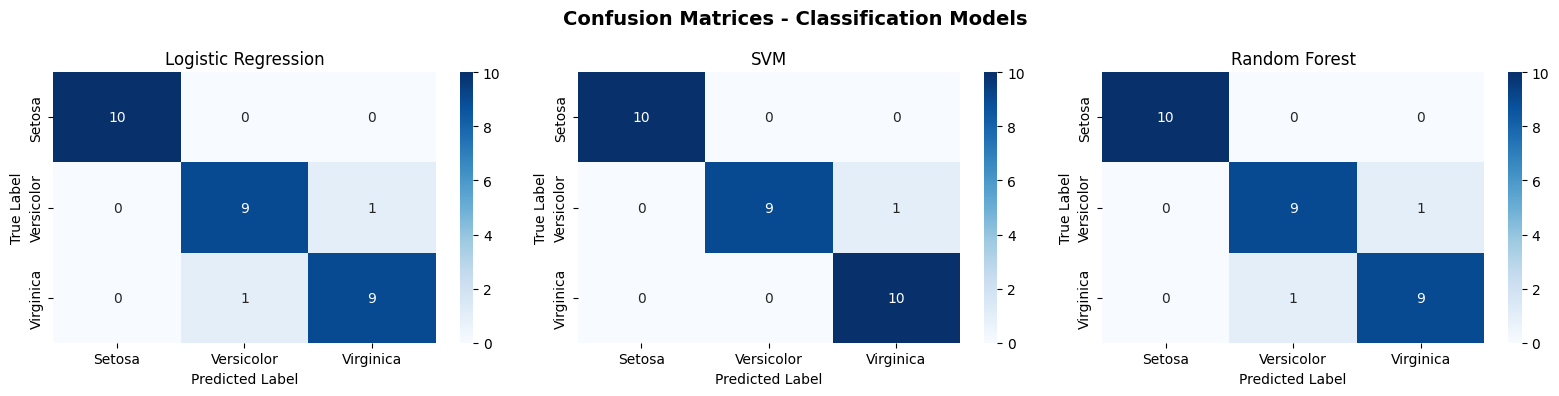

In [ ]:
# STEP 7: DATA EVALUATION
# Evaluation for Classification Models
# Logistic Regression Evaluation
# Logistic Regression Evaluation
print("\n" + "-"*80)
print("1. LOGISTIC REGRESSION")
print("-"*80)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)

print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr,
                          target_names=['Setosa', 'Versicolor', 'Virginica']))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

# SVM Evaluation
print("\n" + "-"*80)
print("2. SUPPORT VECTOR MACHINE (SVM)")
print("-"*80)
y_pred_svm = svm_model.predict(X_test_scaled)

print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm,
                          target_names=['Setosa', 'Versicolor', 'Virginica']))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)

# Random Forest Evaluation
print("\n" + "-"*80)
print("3. RANDOM FOREST")
print("-"*80)
y_pred_rf = rf_model.predict(X_test)

print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['Setosa', 'Versicolor', 'Virginica']))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Confusion Matrices - Classification Models', fontsize=14, fontweight='bold')

cms = [cm_lr, cm_svm, cm_rf]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

for idx, (cm, name) in enumerate(zip(cms, model_names)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Setosa', 'Versicolor', 'Virginica'],
                yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    axes[idx].set_title(name)
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()
plt.close()

print("\n")

In [ ]:
# STEP 8: HYPER-PARAMETER TUNING
print("STEP 8: HYPER-PARAMETER TUNING WITH CROSS-VALIDATION")

STEP 8: HYPER-PARAMETER TUNING WITH CROSS-VALIDATION


In [ ]:
# Cross-Validation Setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Tuning SVM
print("\n" + "-"*80)
print("SVM Hyper-parameter Tuning")
print("-"*80)

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf', 'poly']
}

grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svm.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Best CV Score: {grid_search_svm.best_score_:.4f}")

svm_best = grid_search_svm.best_estimator_
y_pred_svm_best = svm_best.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm_best):.4f}")




--------------------------------------------------------------------------------
SVM Hyper-parameter Tuning
--------------------------------------------------------------------------------
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9663
Test Accuracy: 0.9667


In [ ]:
# Tuning Logistic Regression
print("\n" + "-"*80)
print("Logistic Regression Hyper-parameter Tuning")
print("-"*80)

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_lr.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search_lr.best_params_}")
print(f"Best CV Score: {grid_search_lr.best_score_:.4f}")

lr_best = grid_search_lr.best_estimator_
y_pred_lr_best = lr_best.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_lr_best):.4f}")


--------------------------------------------------------------------------------
Logistic Regression Hyper-parameter Tuning
--------------------------------------------------------------------------------
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.9663
Test Accuracy: 0.9667


In [ ]:
# Tuning Random Forest
print("\n" + "-"*80)
print("Random Forest Hyper-parameter Tuning")
print("-"*80)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best CV Score: {grid_search_rf.best_score_:.4f}")

rf_best = grid_search_rf.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf_best):.4f}")


--------------------------------------------------------------------------------
Random Forest Hyper-parameter Tuning
--------------------------------------------------------------------------------
Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.9659
Test Accuracy: 0.9667


In [ ]:
# Cross-Validation Scores Comparison
print("\n" + "-"*80)
print("Cross-Validation Scores (5-Fold)")
print("-"*80)

cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(f"\nLogistic Regression: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")
print(f"SVM:                 {cv_scores_svm.mean():.4f} (+/- {cv_scores_svm.std():.4f})")
print(f"Random Forest:       {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

print("\n")


--------------------------------------------------------------------------------
Cross-Validation Scores (5-Fold)
--------------------------------------------------------------------------------

Logistic Regression: 0.9569 (+/- 0.0275)
SVM:                 0.9569 (+/- 0.0275)
Random Forest:       0.9482 (+/- 0.0326)




In [ ]:
# STEP 9: BUILD FINAL PIPELINE WITH BEST PARAMETERS

# Create summary of all models
results_summary = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'CV Mean': [],
    'CV Std': []
}
# Original Models
models_to_eval = [
    ('Logistic Regression', lr_model, X_train_scaled, X_test_scaled, cv_scores_lr),
    ('SVM (Original)', svm_model, X_train_scaled, X_test_scaled, cv_scores_svm),
    ('Random Forest', rf_model, X_train, X_test, cv_scores_rf),
]

# Tuned Models
tuned_models = [
    ('Logistic Regression (Tuned)', lr_best, X_train_scaled, X_test_scaled),
    ('SVM (Tuned)', svm_best, X_train_scaled, X_test_scaled),
    ('Random Forest (Tuned)', rf_best, X_train, X_test),
]


for model_name, model, X_tr, X_te, cv_scores in models_to_eval:
    train_acc = model.score(X_tr, y_train)
    test_acc = model.score(X_te, y_test)
    y_pred = model.predict(X_te)

    results_summary['Model'].append(model_name)
    results_summary['Train Accuracy'].append(train_acc)
    results_summary['Test Accuracy'].append(test_acc)
    results_summary['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results_summary['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results_summary['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))
    results_summary['CV Mean'].append(cv_scores.mean())
    results_summary['CV Std'].append(cv_scores.std())

for model_name, model, X_tr, X_te in tuned_models:
    train_acc = model.score(X_tr, y_train)
    test_acc = model.score(X_te, y_test)
    y_pred = model.predict(X_te)

    results_summary['Model'].append(model_name)
    results_summary['Train Accuracy'].append(train_acc)
    results_summary['Test Accuracy'].append(test_acc)
    results_summary['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results_summary['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results_summary['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

    # Get CV scores for tuned models
    if 'Logistic' in model_name:
        cv_sc = cross_val_score(model, X_tr, y_train, cv=kfold, scoring='accuracy')
    elif 'SVM' in model_name:
        cv_sc = cross_val_score(model, X_tr, y_train, cv=kfold, scoring='accuracy')
    else:
        cv_sc = cross_val_score(model, X_tr, y_train, cv=kfold, scoring='accuracy')

    results_summary['CV Mean'].append(cv_sc.mean())
    results_summary['CV Std'].append(cv_sc.std())

results_df = pd.DataFrame(results_summary)

print("\nCOMPREHENSIVE MODEL COMPARISON:")
print("="*150)
print(results_df.to_string(index=False))
print("="*150)


COMPREHENSIVE MODEL COMPARISON:
                      Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  CV Mean   CV Std
        Logistic Regression        0.965517       0.933333   0.933333 0.933333  0.933333 0.956884 0.027508
             SVM (Original)        0.965517       0.966667   0.969697 0.966667  0.966583 0.956884 0.027508
              Random Forest        1.000000       0.933333   0.933333 0.933333  0.933333 0.948188 0.032641
Logistic Regression (Tuned)        0.982759       0.966667   0.969697 0.966667  0.966583 0.965580 0.032447
                SVM (Tuned)        0.956897       0.966667   0.969697 0.966667  0.966583 0.956884 0.047634
      Random Forest (Tuned)        0.974138       0.966667   0.969697 0.966667  0.966583 0.956884 0.027508


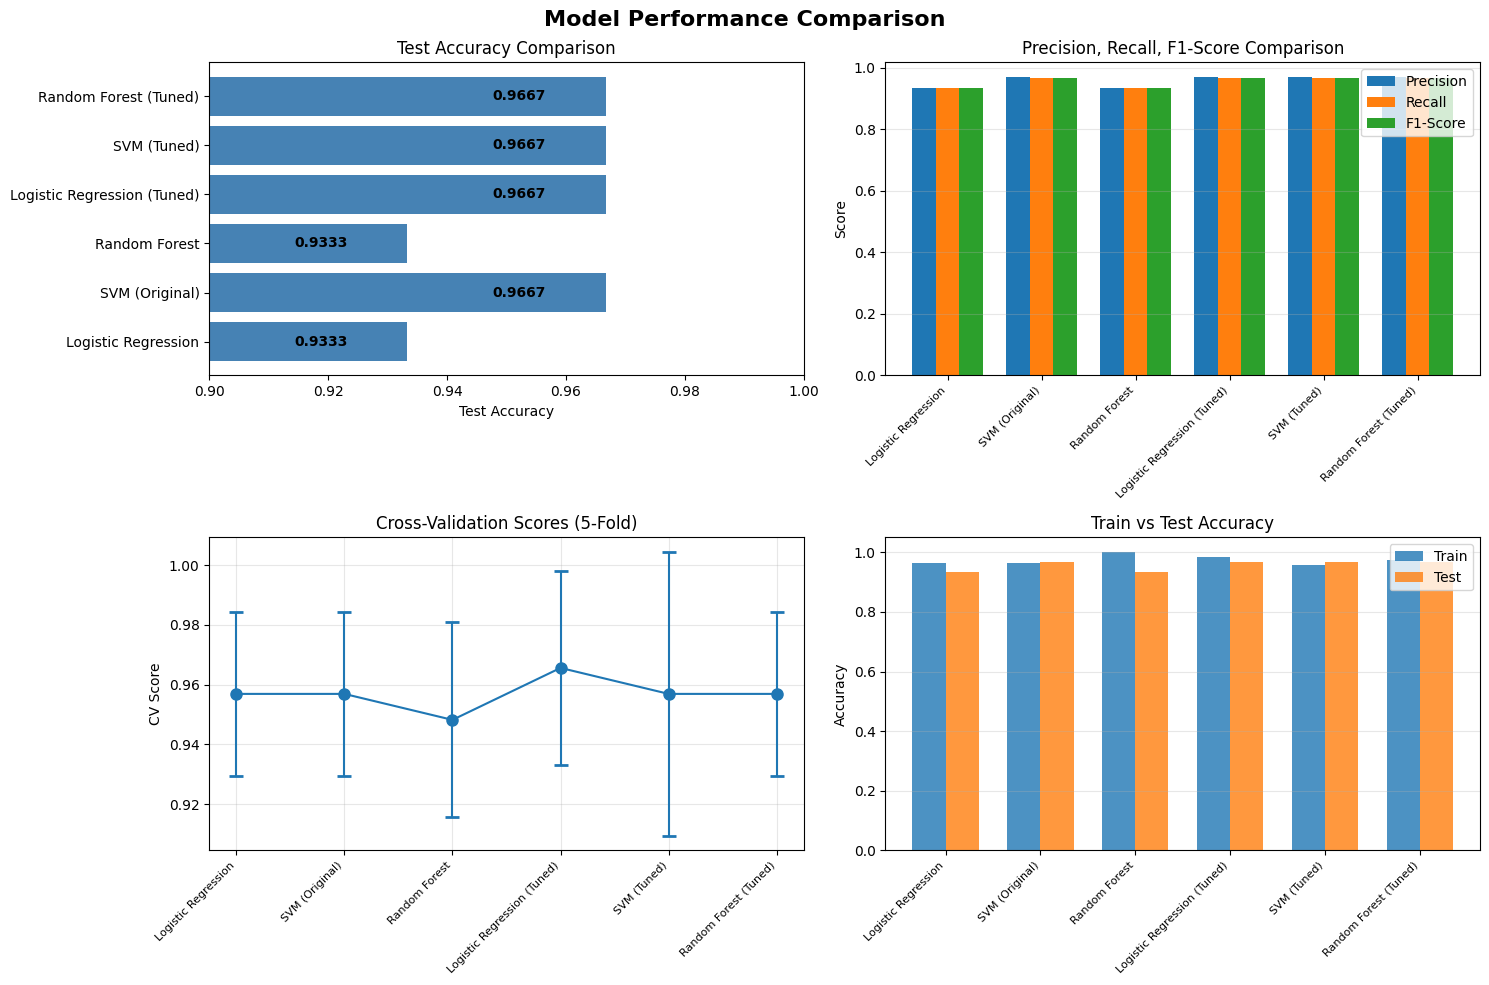

In [ ]:


# Visualize Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Test Accuracy
ax = axes[0, 0]
ax.barh(results_df['Model'], results_df['Test Accuracy'], color='steelblue')
ax.set_xlabel('Test Accuracy')
ax.set_title('Test Accuracy Comparison')
ax.set_xlim([0.9, 1.0])
for i, v in enumerate(results_df['Test Accuracy']):
    ax.text(v - 0.01, i, f'{v:.4f}', va='center', ha='right', fontweight='bold')

# Precision-Recall-F1
ax = axes[0, 1]
x = np.arange(len(results_df))
width = 0.25
ax.bar(x - width, results_df['Precision'], width, label='Precision')
ax.bar(x, results_df['Recall'], width, label='Recall')
ax.bar(x + width, results_df['F1-Score'], width, label='F1-Score')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Cross-Validation Scores
ax = axes[1, 0]
ax.errorbar(range(len(results_df)), results_df['CV Mean'],
            yerr=results_df['CV Std'], fmt='o-', capsize=5, capthick=2, markersize=8)
ax.set_ylabel('CV Score')
ax.set_title('Cross-Validation Scores (5-Fold)')
ax.set_xticks(range(len(results_df)))
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax.grid(alpha=0.3)

# Train vs Test Accuracy
ax = axes[1, 1]
x = np.arange(len(results_df))
width = 0.35
ax.bar(x - width/2, results_df['Train Accuracy'], width, label='Train', alpha=0.8)
ax.bar(x + width/2, results_df['Test Accuracy'], width, label='Test', alpha=0.8)
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Select Best Model
best_model_idx = results_df['Test Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model_accuracy = results_df.loc[best_model_idx, 'Test Accuracy']
print(f"BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {best_model_accuracy:.4f}")

BEST MODEL: SVM (Original)
Test Accuracy: 0.9667


In [ ]:
# STEP 10: COCLUSION
# Cái nào là tốt nhất, tại sao .....